In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('FinancialData.csv')

# Display the first few rows of the dataset
print(data.head())




   S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
0      1  Reliance Inds.        583436.72           99810.00         NaN
1      2             TCS        563709.84           30904.00         NaN
2      3       HDFC Bank        482953.59           20581.27         NaN
3      4             ITC        320985.27            9772.02         NaN
4      5         H D F C        289497.37           16840.51         NaN


In [2]:
# Summary statistics
print(data.describe())

            S.No.  Mar Cap - Crore  Sales Qtr - Crore   Unnamed: 4
count  488.000000       479.000000         365.000000    94.000000
mean   251.508197     28043.857119        4395.976849  1523.870106
std    145.884078     59464.615831       11092.206185  1800.008836
min      1.000000      3017.070000          47.240000     0.000000
25%    122.750000      4843.575000         593.740000   407.167500
50%    252.500000      9885.050000        1278.300000   702.325000
75%    378.250000     23549.900000        2840.750000  2234.815000
max    500.000000    583436.720000      110666.930000  7757.060000


In [3]:
#Concatinating the unnamed column as it denotes the sales quarterly.

data["Sales Quarterly - Crore"] = data["Sales Qtr - Crore"].astype(str) + data["Unnamed: 4"].astype(str)

In [4]:
data['Sales Quarterly - Crore']

0       99810.0nan
1       30904.0nan
2      20581.27nan
3       9772.02nan
4      16840.51nan
          ...     
483      790.17nan
484      249.27nan
485      511.53nan
486     2840.75nan
487         nannan
Name: Sales Quarterly - Crore, Length: 488, dtype: object

In [5]:
data.head(488)

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4,Sales Quarterly - Crore
0,1,Reliance Inds.,583436.72,99810.00,NaN,99810.0nan
1,2,TCS,563709.84,30904.00,NaN,30904.0nan
2,3,HDFC Bank,482953.59,20581.27,NaN,20581.27nan
3,4,ITC,320985.27,9772.02,NaN,9772.02nan
4,5,H D F C,289497.37,16840.51,NaN,16840.51nan
...,...,...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17,NaN,790.17nan
484,497,NOCIL,3026.26,249.27,NaN,249.27nan
485,498,Orient Cement,3024.32,511.53,NaN,511.53nan
486,499,Natl.Fertilizer,3017.07,2840.75,NaN,2840.75nan


In [6]:
# Replacing the "nan" in the new column with 0
data["Sales Quarterly - Crore"] = data["Sales Quarterly - Crore"].replace({"nan" : 0})
data["Sales Quarterly - Crore"]

0       99810.0nan
1       30904.0nan
2      20581.27nan
3       9772.02nan
4      16840.51nan
          ...     
483      790.17nan
484      249.27nan
485      511.53nan
486     2840.75nan
487         nannan
Name: Sales Quarterly - Crore, Length: 488, dtype: object

In [7]:
# Replacing the "nan" in the new column with 0

def replace_nan_with_zero(value):
    if isinstance(value, str) and 'nan' in value:
        return value.replace('nan', '0')
    else:
        return value
data = data.applymap(replace_nan_with_zero)
data

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4,Sales Quarterly - Crore
0,1,Reliance Inds.,583436.72,99810.00,NaN,99810.00
1,2,TCS,563709.84,30904.00,NaN,30904.00
2,3,HDFC Bank,482953.59,20581.27,NaN,20581.270
3,4,ITC,320985.27,9772.02,NaN,9772.020
4,5,H D F C,289497.37,16840.51,NaN,16840.510
...,...,...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17,NaN,790.170
484,497,NOCIL,3026.26,249.27,NaN,249.270
485,498,Orient Cement,3024.32,511.53,NaN,511.530
486,499,Natl.Fertilizer,3017.07,2840.75,NaN,2840.750


In [8]:
# Deleting the unnecessary column
del data["Sales Quarterly - Crore"]

In [9]:
data

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
...,...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17,NaN
484,497,NOCIL,3026.26,249.27,NaN
485,498,Orient Cement,3024.32,511.53,NaN
486,499,Natl.Fertilizer,3017.07,2840.75,NaN


In [10]:
print(data.isnull().sum())

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64


In [11]:
#Dropping the null values as this will be the most suitalbe option to deal with the NA values. 
cleaned_data =data.dropna()
cleaned_data

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4


In [12]:
data.to_csv('cleaned_data.csv', index=False)

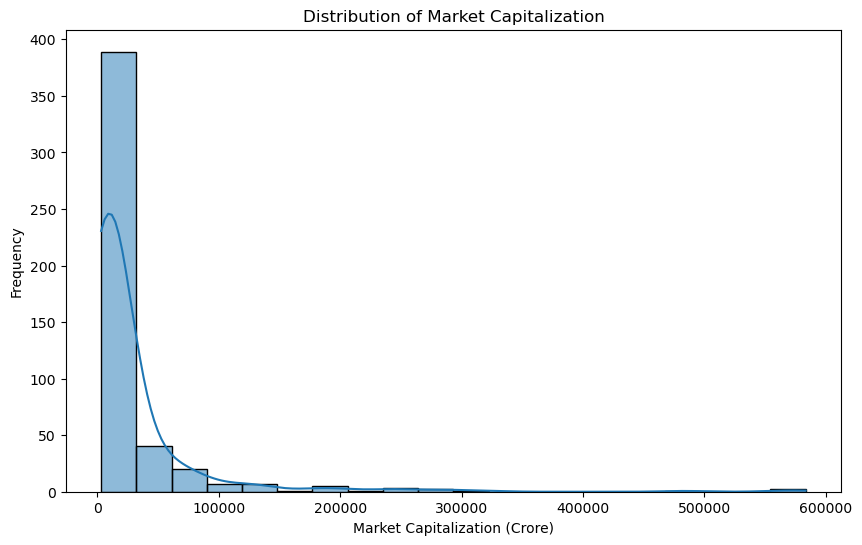

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Mar Cap - Crore'], bins=20, kde=True)
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Frequency')
plt.show()

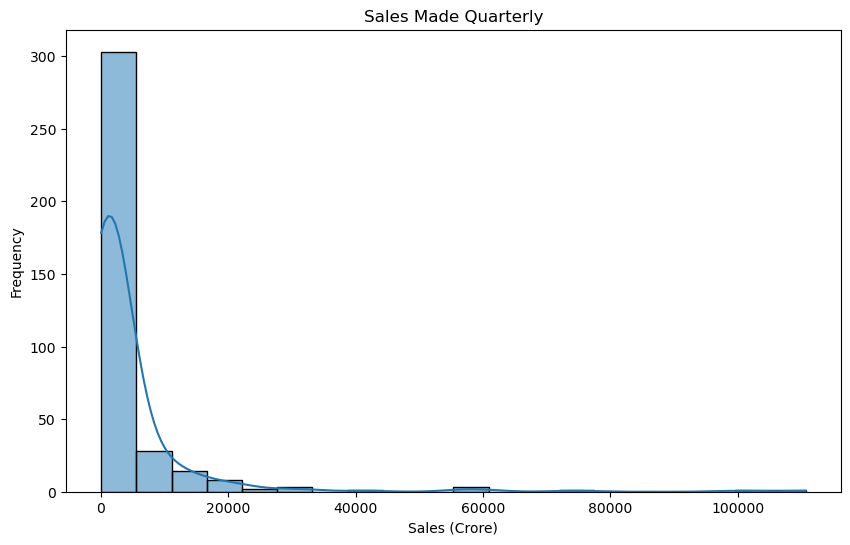

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data['Sales Qtr - Crore'], bins=20, kde=True)
plt.title("Sales Made Quarterly")
plt.xlabel('Sales (Crore)')
plt.ylabel('Frequency')
plt.show()

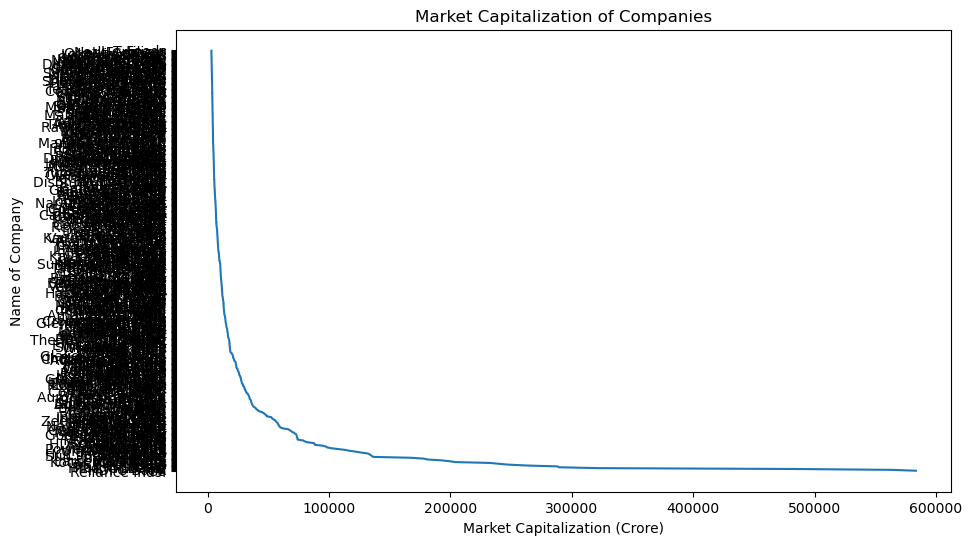

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(data['Mar Cap - Crore'], data['Name'])
plt.title('Market Capitalization of Companies')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Name of Company')
plt.show()

# As this visualzation is too much saturated, so now we will use the PowerBI to visualize the data

In [16]:
# Calculate market capitalization as a percentage of total sales
data['MarketCap_Sales_Ratio'] = (data['Mar Cap - Crore'] / data['Sales Qtr - Crore']) * 100
data['MarketCap_Sales_Ratio']

0       584.547360
1      1824.067564
2      2346.568458
3      3284.738161
4      1719.053461
          ...     
483     383.407368
484    1214.049023
485     591.230231
486     106.206812
487            NaN
Name: MarketCap_Sales_Ratio, Length: 488, dtype: float64